# Матчинг изображений по характерным точкам

Данильченко Вадим

In [1]:
# !pip install opencv-contrib-python==3.2.0.7 opencv-python==3.2.0.7

In [2]:
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt

## Загружаем изображения для матчинга

In [3]:
img1 = cv2.imread('./HOMEWORKS/data/pattern2.png', cv2.IMREAD_GRAYSCALE)          # шаблон
img2 = cv2.imread('./HOMEWORKS/data/doc_with_pattern2.png', cv2.IMREAD_GRAYSCALE) # сцена

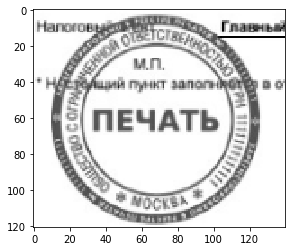

In [4]:
plt.imshow(img1, cmap='gray')
# plt.title('Шаблон %dx%d' % img1.shape);

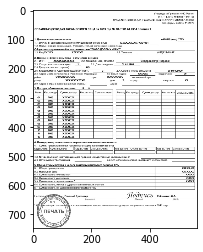

In [5]:
plt.imshow(img2, cmap='gray')
# plt.title('Сцена %dx%d' % img2.shape)

In [6]:
type(img1)

numpy.ndarray

## Ищем характерные точки и вычисляем для них дескрипторы

In [7]:
# https://en.wikipedia.org/wiki/Oriented_FAST_and_rotated_BRIEF

# инициализируем детектор точек
orb = cv2.ORB_create()

# запускаем поиск точек и вычисление дескрипторов
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

## Отображаем найденные характерные точки

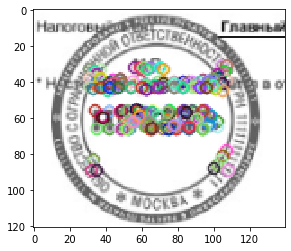

In [8]:
img1_kp = cv2.drawKeypoints(img1, kp1, np.zeros_like(img1))
plt.imshow(img1_kp)

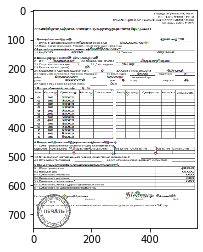

In [9]:
img2_kp = cv2.drawKeypoints(img2, kp2, np.zeros_like(img1))
plt.imshow(img2_kp)

## Ищем соответствия между шаблоном и сценой

In [10]:
(des2)

array([[102,  80, 100, ...,  47,  19,  81],
       [ 15, 201, 104, ..., 159, 149, 233],
       [237, 237,   0, ..., 127, 217, 130],
       ...,
       [ 30,  31, 143, ..., 127, 181, 211],
       [118, 238, 170, ..., 115, 167, 210],
       [ 19, 164,   7, ...,  68, 177,  44]], dtype=uint8)

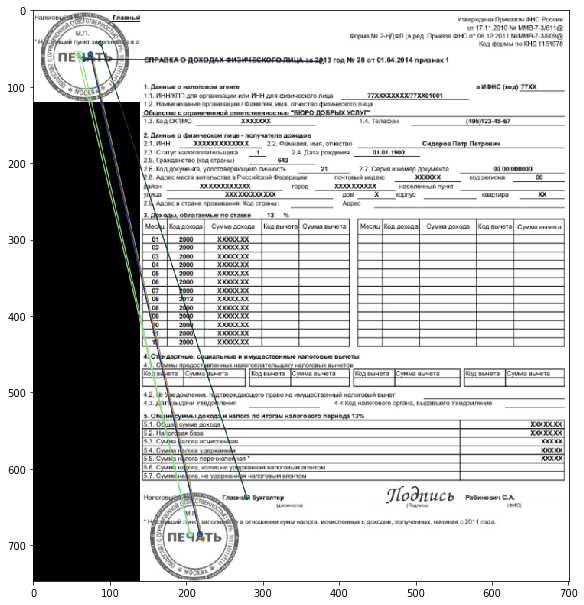

(<matplotlib.image.AxesImage at 0x23f86344308>, None)

In [11]:
# матчинг полным перебором - brute force matching
# мера расстояния - расстояние Хэмминга (количество несовпадающих компонент)
bf = cv2.BFMatcher(cv2.NORM_HAMMING)

# матчинг
matches = bf.match(des1, des2)

# сортируем результат по возрастанию расстояния
matches = sorted(matches, key = lambda x: x.distance)

# выводим 10 лучших совпадений
img3 = np.zeros_like(img2)
img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:7], img3, flags=2)

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.imshow(img3),plt.show()